In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (confusion_matrix, plot_confusion_matrix, 
    accuracy_score, precision_score, recall_score, f1_score)
import matplotlib.pyplot as plt
import numpy as np
import pickle

path = '/home/grace/ml_bootcamp/creditcard/' # path to local folder
seed = 18 # for random_state


In [2]:
# Load train/test data from CSVs to dataframes
X_train_path = path + 'train_features.csv'
y_train_path = path + 'train_labels.csv'
X_test_path = path + 'test_features.csv'
y_test_path = path + 'test_labels.csv'

X_train = pd.read_csv(X_train_path)
y_train = pd.read_csv(y_train_path)
X_test = pd.read_csv(X_test_path)
y_test = pd.read_csv(y_test_path)


In [3]:
# Make decision tree classifier
weights = {0:600, 1:1}

tree = DecisionTreeClassifier(max_depth=6, random_state=seed, 
                            class_weight=weights)
tree.fit(X_train, y_train)
y_trainer = tree.predict(X_train)
y_pred = tree.predict(X_test)

[[189631      7]
 [ 27810 161828]]
[[94664    13]
 [   32   132]]


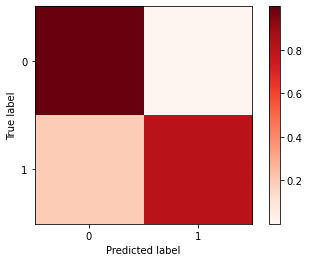

In [4]:
# Confusion matrix
print(confusion_matrix(y_train,y_trainer))
print(confusion_matrix(y_test, y_pred))

plot_confusion_matrix(tree, X_test, y_test, normalize='true', 
        include_values=False, cmap='Reds')
plt.savefig('tree_confusion.png', dpi=300, bbox_inches='tight')


In [5]:
# Score tree
acc_train = accuracy_score(y_train, y_trainer)
acc_test = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy on training set: {}".format(acc_train))
print("Accuracy on test set: {}".format(acc_test))
print("The precision is {}".format(precision))
print("The recall/sensitivity is {}".format(recall))
print("The F1 score is {}".format(f1))


Accuracy on training set: 0.9266576319092165
Accuracy on test set: 0.9995255216625721
The precision is 0.9103448275862069
The recall/sensitivity is 0.8048780487804879
The F1 score is 0.854368932038835


Feature importances:
[0.00240732 0.00999743 0.         0.00338632 0.00938373 0.
 0.         0.01524781 0.         0.00169299 0.11401785 0.
 0.00661404 0.         0.08223423 0.         0.         0.65499454
 0.01953639 0.         0.00170771 0.00509088 0.00206649 0.00215375
 0.00345877 0.         0.0282328  0.02832429 0.         0.00945267]


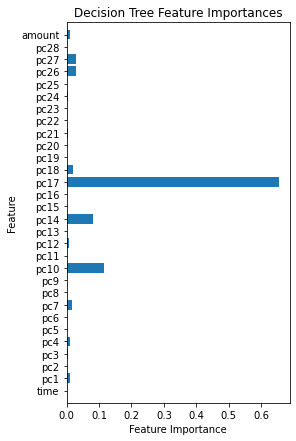

In [6]:
# Show feature importances
feature_names = ['pc{}'.format(i) for i in range(1,29)]
feature_names.insert(0,"time")
feature_names.append("amount")

print("Feature importances:\n{}".format(tree.feature_importances_))

plt.figure(figsize=(4,7))
plt.barh(range(30), tree.feature_importances_, align='center')
plt.title('Decision Tree Feature Importances')
plt.yticks(np.arange(30), feature_names)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.ylim(-1, 30)
plt.savefig('tree_feature_importances.png', dpi=1200, bbox_inches="tight")

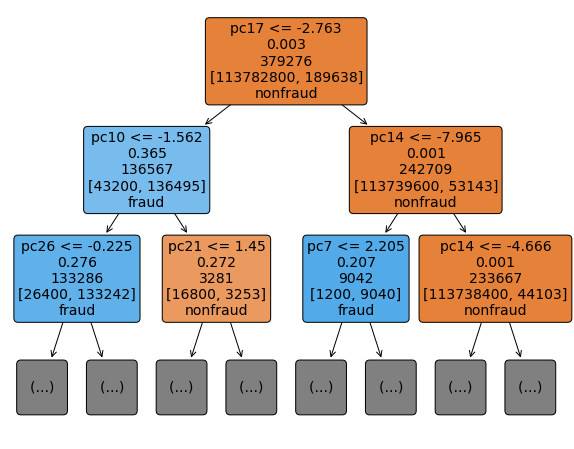

In [7]:
# Visualize tree
plt.subplots(figsize=(10,8))
plot_tree(tree, max_depth=2, feature_names=feature_names, 
            class_names=["nonfraud", "fraud"], label='none', filled=True, 
            impurity=True, rounded=True, fontsize=14)
plt.savefig('tree_graph.png', bbox_inches='tight')


In [8]:
# Save model and predictions
pickle.dump(tree, open("tree_model.pkl","wb"))

tree_results = pd.DataFrame(y_pred)
tree_results.to_csv(path + 'tree_results.csv', index=False)